In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from datetime import datetime
import cv2
import time

In [12]:
data_train_path='./dataset/newDatasetSplit/train'
data_test_path='./dataset/newDatasetSplit/test'
data_val_path='./dataset/newDatasetSplit/val/'

In [13]:
img_width = 180
img_height = 180

In [14]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 3900 files belonging to 26 classes.


In [15]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 18174 files belonging to 26 classes.


In [16]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size = 32,
    validation_split=False
)

Found 3926 files belonging to 26 classes.


In [17]:
data_cat = data_train.class_names
print(data_cat)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']


2025-05-05 09:11:20.818028: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


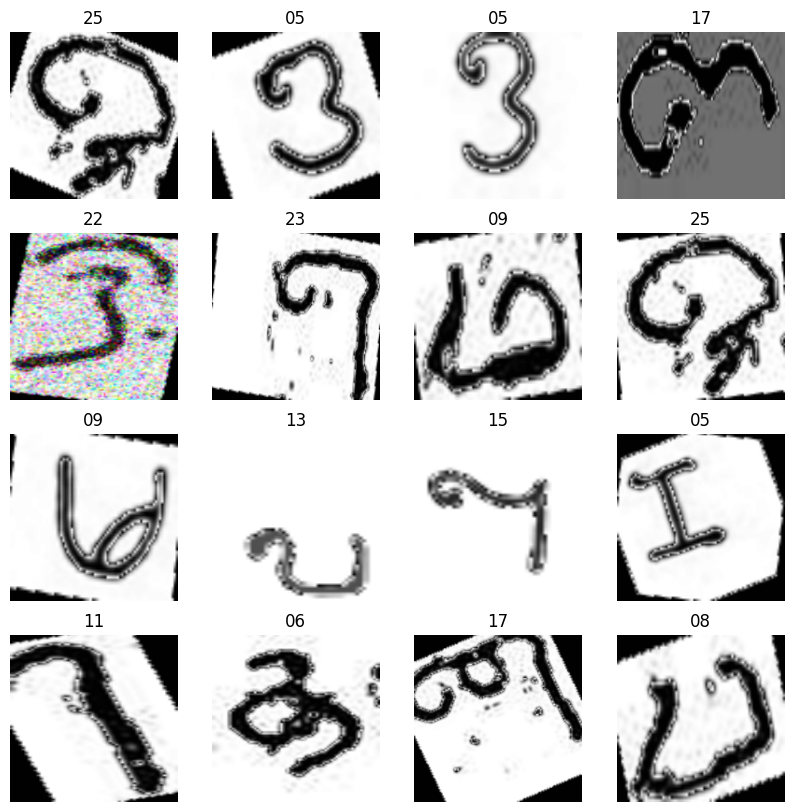

In [18]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [19]:
from tensorflow.keras.models import Sequential # type: ignore

In [20]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# gpus = tf.config.experimental.list_physical_devices('GPU')

# if gpus:
#     # Print GPU details
#     print(f"Using GPU: {tf.config.experimental.get_device_details(gpus[0])['device_name']}")
#     with tf.device('/GPU:0'):
#         # Define the number of classes
#         num_classes = len(data_cat)

#         # Define the model
#         model = Sequential([
#             Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), kernel_regularizer=l2(0.001)),
#             MaxPooling2D(pool_size=(2, 2)),

#             Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#             MaxPooling2D(pool_size=(2, 2)),

#             Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
#             MaxPooling2D(pool_size=(2, 2)),

#             Flatten(),
#             Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
#             Dropout(0.5),  # Dropout to prevent overfitting
#             Dense(num_classes, activation='softmax')
#         ])

# # Compile the model
# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Set callbacks
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# checkpoint = ModelCheckpoint(
#     'best_model.h5',
#     monitor='val_loss',
#     save_best_only=True,
#     verbose=1
# )

# # Train the model
# history = model.fit(
#     data_train,
#     epochs=32,
#     validation_data=data_val,
#     callbacks=[early_stop, checkpoint]  # include both
# )

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # Print GPU details
    print(f"Using GPU: {tf.config.experimental.get_device_details(gpus[0])['device_name']}")
    with tf.device('/GPU:0'):
        # Define your model architecture
        model = Sequential([
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3, padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.Dense(len(data_cat))

    ])

        # Compile the model
        model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])
else:
    print("No GPU detected, running on CPU.")

Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU
Epoch 1/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3168 - loss: 13.8782
Epoch 1: val_loss improved from inf to 0.70535, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 51s 70ms/step - accuracy: 0.3172 - loss: 13.8608 - val_accuracy: 0.9185 - val_loss: 0.7053
Epoch 2/32
533/568 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8356 - loss: 1.0042
Epoch 2: val_loss improved from 0.70535 to 0.64639, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.8370 - loss: 0.9992 - val_accuracy: 0.9569 - val_loss: 0.6464
Epoch 3/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8969 - loss: 0.7948
Epoch 3: val_loss improved from 0.64639 to 0.54370, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.8969 - loss: 0.7947 - val_accuracy: 0.9731 - val_loss: 0.5437
Epoch 4/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9256 - loss: 0.6769
Epoch 4: val_loss improved from 0.54370 to 0.51614, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.9257 - loss: 0.6769 - val_accuracy: 0.9741 - val_loss: 0.5161
Epoch 5/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9295 - loss: 0.6507
Epoch 5: val_loss improved from 0.51614 to 0.50904, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9295 - loss: 0.6507 - val_accuracy: 0.9800 - val_loss: 0.5090
Epoch 6/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9402 - loss: 0.6252
Epoch 6: val_loss improved from 0.50904 to 0.50050, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.9402 - loss: 0.6252 - val_accuracy: 0.9785 - val_loss: 0.5005
Epoch 7/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9327 - loss: 0.6577
Epoch 7: val_loss did not improve from 0.50050
568/568 ━━━━━━━━━━━━━━━━━━━━ 33s 59ms/step - accuracy: 0.9328 - loss: 0.6577 - val_accuracy: 0.9849 - val_loss: 0.5112
Epoch 8/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9438 - loss: 0.6283
Epoch 8: val_loss improved from 0.50050 to 0.49457, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step - accuracy: 0.9438 - loss: 0.6283 - val_accuracy: 0.9844 - val_loss: 0.4946
Epoch 9/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9452 - loss: 0.6012
Epoch 9: val_loss improved from 0.49457 to 0.48762, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.9452 - loss: 0.6012 - val_accuracy: 0.9836 - val_loss: 0.4876
Epoch 10/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9460 - loss: 0.5869
Epoch 10: val_loss did not improve from 0.48762
568/568 ━━━━━━━━━━━━━━━━━━━━ 34s 60ms/step - accuracy: 0.9460 - loss: 0.5869 - val_accuracy: 0.9805 - val_loss: 0.5187
Epoch 11/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9482 - loss: 0.5915
Epoch 11: val_loss improved from 0.48762 to 0.48062, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.9482 - loss: 0.5915 - val_accuracy: 0.9854 - val_loss: 0.4806
Epoch 12/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9498 - loss: 0.6024
Epoch 12: val_loss improved from 0.48062 to 0.46791, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 43s 75ms/step - accuracy: 0.9498 - loss: 0.6024 - val_accuracy: 0.9879 - val_loss: 0.4679
Epoch 13/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9532 - loss: 0.5695
Epoch 13: val_loss did not improve from 0.46791
568/568 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9532 - loss: 0.5696 - val_accuracy: 0.9844 - val_loss: 0.4808
Epoch 14/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9537 - loss: 0.5813
Epoch 14: val_loss did not improve from 0.46791
568/568 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.9537 - loss: 0.5814 - val_accuracy: 0.9838 - val_loss: 0.4734
Epoch 15/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9520 - loss: 0.5633
Epoch 15: val_loss did not improve from 0.46791
568/568 ━━━━━━━━━━━━━━━━━━━━ 36s 62ms/step - accuracy: 0.9520 - loss: 0.5632 - val_accuracy: 0.9787 - val_loss: 0.4791
Epoch 16/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9552 - loss: 0.5544
Epoch 16: val_loss improved 

568/568 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.9552 - loss: 0.5544 - val_accuracy: 0.9844 - val_loss: 0.4655
Epoch 17/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9519 - loss: 0.5570
Epoch 17: val_loss improved from 0.46554 to 0.45150, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 37s 65ms/step - accuracy: 0.9519 - loss: 0.5570 - val_accuracy: 0.9864 - val_loss: 0.4515
Epoch 18/32
547/568 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9586 - loss: 0.5262
Epoch 18: val_loss did not improve from 0.45150
568/568 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.9586 - loss: 0.5262 - val_accuracy: 0.9810 - val_loss: 0.4570
Epoch 19/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9567 - loss: 0.5209
Epoch 19: val_loss improved from 0.45150 to 0.43568, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.9567 - loss: 0.5209 - val_accuracy: 0.9818 - val_loss: 0.4357
Epoch 20/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9573 - loss: 0.5047
Epoch 20: val_loss improved from 0.43568 to 0.41278, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.9573 - loss: 0.5047 - val_accuracy: 0.9892 - val_loss: 0.4128
Epoch 21/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9620 - loss: 0.5052
Epoch 21: val_loss did not improve from 0.41278
568/568 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.9620 - loss: 0.5052 - val_accuracy: 0.9862 - val_loss: 0.4215
Epoch 22/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9598 - loss: 0.5085
Epoch 22: val_loss did not improve from 0.41278
568/568 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.9598 - loss: 0.5085 - val_accuracy: 0.9828 - val_loss: 0.4287
Epoch 23/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9604 - loss: 0.5043
Epoch 23: val_loss improved from 0.41278 to 0.40542, saving model to best_model.h5


568/568 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.9604 - loss: 0.5043 - val_accuracy: 0.9895 - val_loss: 0.4054
Epoch 24/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9607 - loss: 0.4873
Epoch 24: val_loss did not improve from 0.40542
568/568 ━━━━━━━━━━━━━━━━━━━━ 37s 64ms/step - accuracy: 0.9607 - loss: 0.4873 - val_accuracy: 0.9854 - val_loss: 0.4110
Epoch 25/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9594 - loss: 0.4977
Epoch 25: val_loss did not improve from 0.40542
568/568 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.9594 - loss: 0.4977 - val_accuracy: 0.9869 - val_loss: 0.4153
Epoch 26/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9646 - loss: 0.4819
Epoch 26: val_loss did not improve from 0.40542
568/568 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - accuracy: 0.9646 - loss: 0.4819 - val_accuracy: 0.9869 - val_loss: 0.4068
Epoch 27/32
567/568 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9608 - loss: 0.4869
Epoch 27: val_loss did not i

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
epochs_size = 32

In [ ]:
# history = model.fit(data_train,validation_data=data_val, epochs=epochs_size)

Epoch 1/32


I0000 00:00:1746378678.199815  115901 service.cc:152] XLA service 0x7f7e7c15b750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746378678.199889  115901 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-05-04 17:11:18.620834: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746378679.251997  115901 cuda_dnn.cc:529] Loaded cuDNN version 90501
I0000 00:00:1746378692.827035  115901 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


568/568 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - accuracy: 0.6440 - loss: 1.3729 - val_accuracy: 0.9551 - val_loss: 0.1491
Epoch 2/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.9647 - loss: 0.1219 - val_accuracy: 0.9674 - val_loss: 0.1147
Epoch 3/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9821 - loss: 0.0563 - val_accuracy: 0.9713 - val_loss: 0.1052
Epoch 4/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.9873 - loss: 0.0420 - val_accuracy: 0.9815 - val_loss: 0.0616
Epoch 5/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9772 - val_loss: 0.0740
Epoch 6/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9924 - loss: 0.0246 - val_accuracy: 0.9746 - val_loss: 0.0921
Epoch 7/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9682 - val_loss: 0.1181
Epoch 8/32
568/568 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9926 - loss: 0.0204 - val_accurac

In [ ]:
# # save model
model.save('sample.h5')
print('Model Saved!')
#! load model


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=sample.pkl.

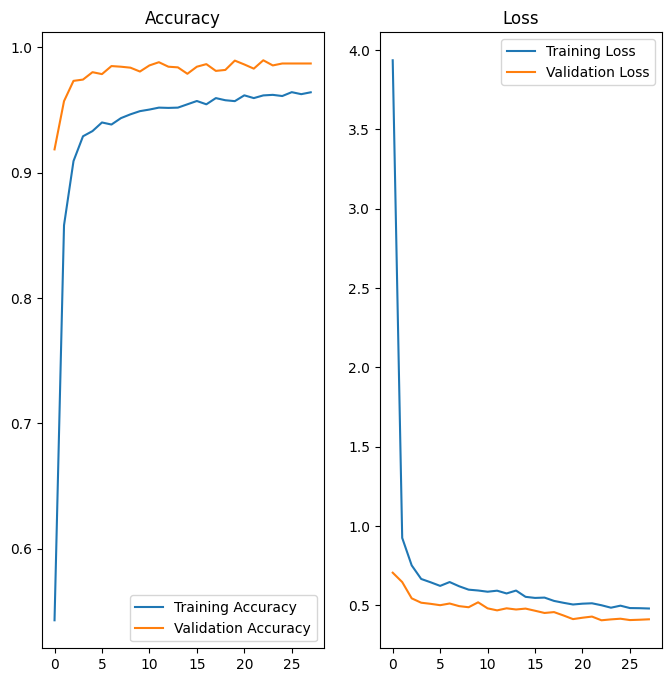

In [37]:
# Adjust epochs_range to match the length of history.history['accuracy']
epochs_range = range(len(history.history['accuracy']))
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

In [38]:
savedModel=load_model('best_model.h5')
# savedModel.summary()
image_path = './char_69.png'  # Replace with your image path
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Normalize pixel values to be between 0 and 1
img_bat = img_array
predict = savedModel.predict(img_bat)
score = tf.nn.softmax(predict)
predicted_category = np.argmax(score)
accuracy = np.max(score) * 100
print(f"Predicted category: {data_cat[predicted_category]}")
print(f"Prediction accuracy: {accuracy:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted category: 06
Prediction accuracy: 8.97%


In [39]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# 1. Turn off shuffling for evaluation to maintain label order
data_test_noshuffle = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32
)

# 2. Get predictions and true labels
y_pred = []
y_true = []

for images, labels in data_test_noshuffle:
    logits = savedModel.predict(images)
    preds = np.argmax(logits, axis=1)
    y_pred.extend(preds)
    y_true.extend(labels.numpy())

# 3. Convert to arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 4. Calculate metrics
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true, y_pred)

# 5. Print results
print(f"\nEvaluation Metrics:")
print(f"Accuracy :  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Optional: detailed classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=data_cat, zero_division=0))


Found 3926 files belonging to 26 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━

2025-05-05 03:26:15.919084: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
len(data_test)

123

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get the true labels and predicted labels
y_true = []
y_pred = []

for images, labels in data_test:
    preds = savedModel.predict(images)
    preds = tf.argmax(preds, axis=1)
    y_pred.extend(preds.numpy())
    y_true.extend(labels.numpy())

# Generate classification report
report = classification_report(y_true, y_pred, target_names=data_cat)
print("Classification Report:\n", report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━

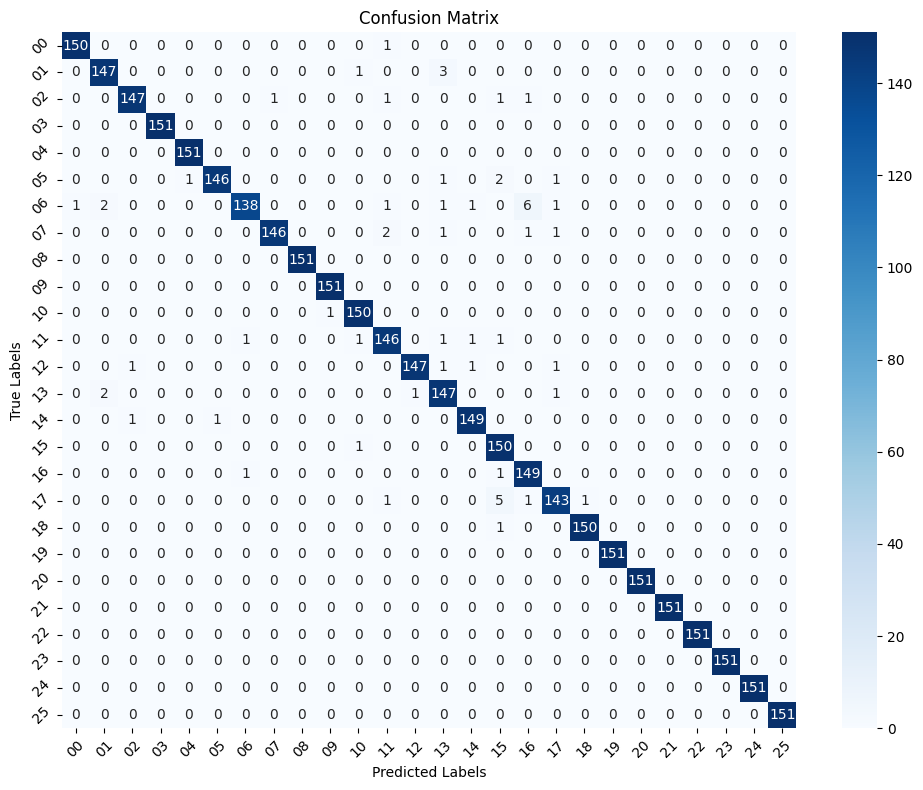

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted category: 16
Prediction accuracy: 98.97%


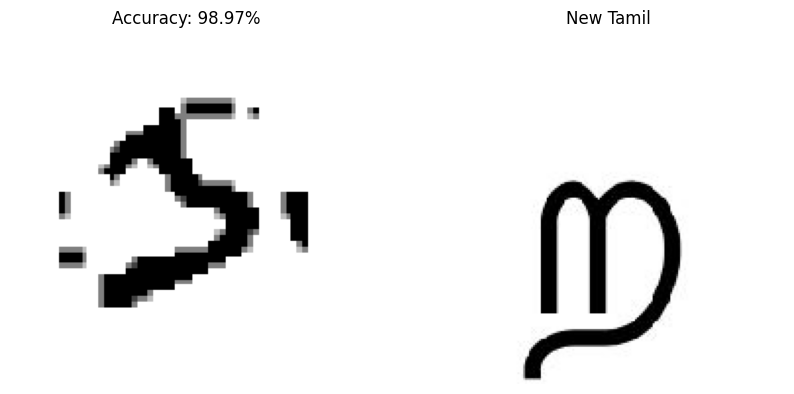

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model
savedModel = load_model('sample.h5')

# Image input dimensions (adjust to your model’s input)
img_height, img_width = 180, 180  # Match the dimensions used during training

# Load and preprocess image
image_path = './char_69.png'
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
# Convert the image to a NumPy array and preprocess it
img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict using the model
predict = savedModel.predict(img_array)
score = tf.nn.softmax(predict[0])  # Apply softmax to the first batch
predicted_category = np.argmax(score)
accuracy = np.max(score) * 100
print(f"Predicted category: {data_cat[predicted_category]}")
print(f"Prediction accuracy: {accuracy:.2f}%")

# display the image in subplot two images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title(f"Accuracy: {accuracy:.2f}%")

image_path = f'./dataset/OneDrive_2025-03-20/New mapping/{data_cat[predicted_category]}/{data_cat[predicted_category]}.png'
image_out = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
plt.subplot(1, 2, 2)
plt.imshow(image_out)
plt.axis('off')
plt.title(f"New Tamil")
plt.show()
